In [19]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [20]:
from fastai import *
from fastai.vision import *
import os

In [21]:
bs = 8

In [22]:
data_dir = '../input/car_data/car_data/'
path = Path(data_dir)

In [23]:
tfms = get_transforms(do_flip = True)
data = (ImageList.from_folder(path)
        .split_by_rand_pct()
        .label_from_folder()
        .transform(tfms, size=256)
        .databunch()).normalize(imagenet_stats)

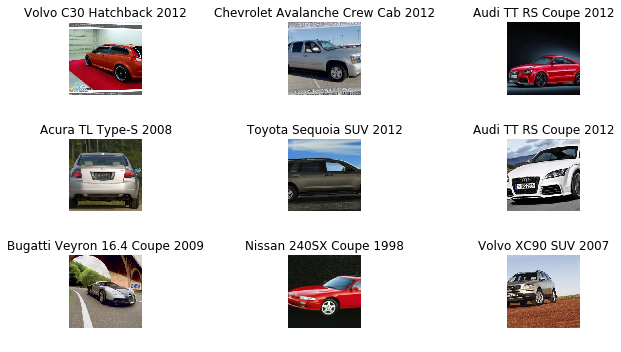

In [24]:
data.show_batch(rows = 3,figsize = (9,5))

In [25]:
learn = cnn_learner(data,models.resnet152,metrics = accuracy,model_dir = '/tmp/model/')

In [26]:
print(data.classes)
len(data.classes),data.c

['AM General Hummer SUV 2000', 'Acura Integra Type R 2001', 'Acura RL Sedan 2012', 'Acura TL Sedan 2012', 'Acura TL Type-S 2008', 'Acura TSX Sedan 2012', 'Acura ZDX Hatchback 2012', 'Aston Martin V8 Vantage Convertible 2012', 'Aston Martin V8 Vantage Coupe 2012', 'Aston Martin Virage Convertible 2012', 'Aston Martin Virage Coupe 2012', 'Audi 100 Sedan 1994', 'Audi 100 Wagon 1994', 'Audi A5 Coupe 2012', 'Audi R8 Coupe 2012', 'Audi RS 4 Convertible 2008', 'Audi S4 Sedan 2007', 'Audi S4 Sedan 2012', 'Audi S5 Convertible 2012', 'Audi S5 Coupe 2012', 'Audi S6 Sedan 2011', 'Audi TT Hatchback 2011', 'Audi TT RS Coupe 2012', 'Audi TTS Coupe 2012', 'Audi V8 Sedan 1994', 'BMW 1 Series Convertible 2012', 'BMW 1 Series Coupe 2012', 'BMW 3 Series Sedan 2012', 'BMW 3 Series Wagon 2012', 'BMW 6 Series Convertible 2007', 'BMW ActiveHybrid 5 Sedan 2012', 'BMW M3 Coupe 2012', 'BMW M5 Sedan 2010', 'BMW M6 Convertible 2010', 'BMW X3 SUV 2012', 'BMW X5 SUV 2007', 'BMW X6 SUV 2012', 'BMW Z4 Convertible 2012

(196, 196)

In [27]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (downsample): Sequential(
          (0): Conv2d(64, 256, kernel_s

In [28]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,3.958487,2.821278,0.344146,07:36
1,2.120645,1.377716,0.624652,07:36
2,1.346291,0.899025,0.756874,07:36
3,0.928129,0.727294,0.798579,07:34
4,0.730059,0.692042,0.807538,07:37


In [29]:
learn.save('model1')

In [30]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)


True

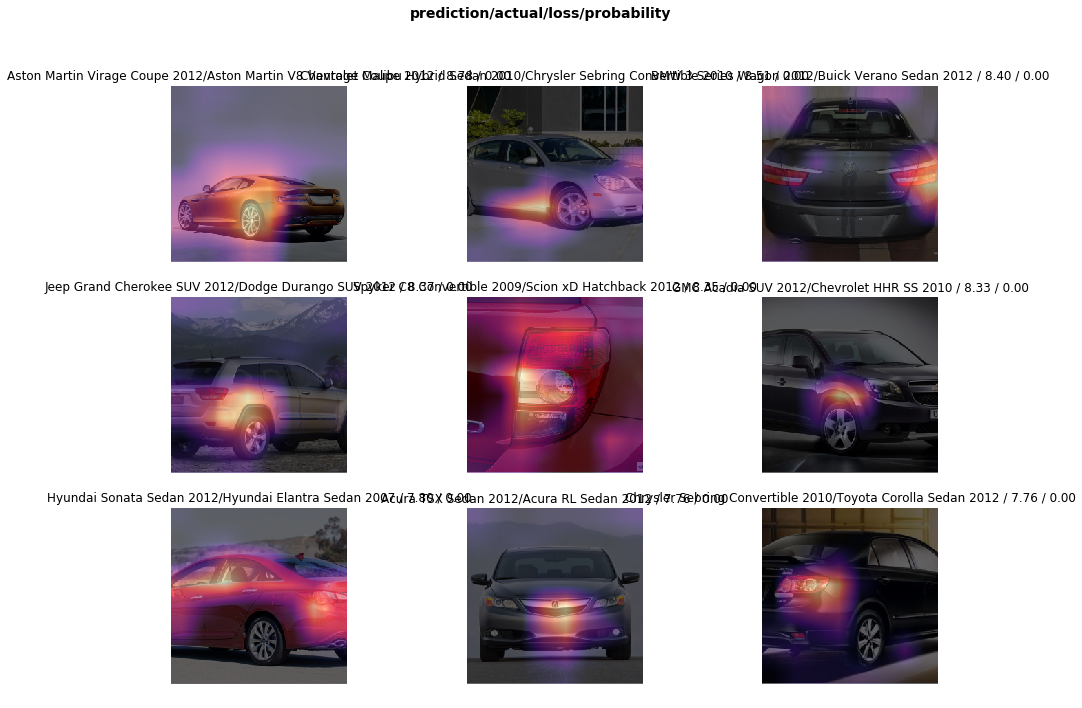

In [31]:
interp.plot_top_losses(9, figsize=(15,11))

In [32]:
doc(interp.plot_top_losses)
interp.most_confused(min_val=2)

[('Chevrolet Express Van 2007', 'GMC Savana Van 2012', 8),
 ('Chevrolet Express Cargo Van 2007', 'GMC Savana Van 2012', 7),
 ('Chevrolet Express Cargo Van 2007', 'Chevrolet Express Van 2007', 5),
 ('Audi S4 Sedan 2007', 'Audi S6 Sedan 2011', 4),
 ('Audi TT Hatchback 2011', 'Audi TTS Coupe 2012', 4),
 ('Audi TT RS Coupe 2012', 'Audi TT Hatchback 2011', 4),
 ('Audi TTS Coupe 2012', 'Audi TT Hatchback 2011', 4),
 ('Audi V8 Sedan 1994', 'Audi 100 Sedan 1994', 4),
 ('Chevrolet Silverado 2500HD Regular Cab 2012',
  'Chevrolet Silverado 1500 Regular Cab 2012',
  4),
 ('Chevrolet Tahoe Hybrid SUV 2012', 'Chevrolet Avalanche Crew Cab 2012', 4),
 ('Chevrolet Tahoe Hybrid SUV 2012', 'GMC Yukon Hybrid SUV 2012', 4),
 ('Rolls-Royce Ghost Sedan 2012', 'Rolls-Royce Phantom Sedan 2012', 4),
 ('Spyker C8 Coupe 2009', 'Spyker C8 Convertible 2009', 4),
 ('Aston Martin V8 Vantage Coupe 2012',
  'Aston Martin V8 Vantage Convertible 2012',
  3),
 ('Aston Martin Virage Convertible 2012',
  'Aston Martin V8 V

In [33]:
learn.lr_find(num_it = 200)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


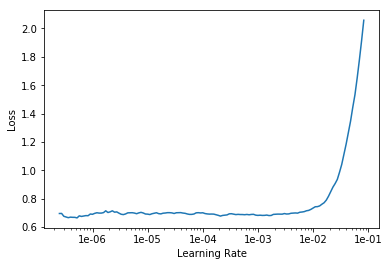

In [34]:
learn.recorder.plot()

In [35]:
learn.unfreeze()
learn.fit_one_cycle(10, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.697823,0.674343,0.812172,07:51
1,0.656424,0.625019,0.824838,07:54
2,0.589818,0.563740,0.842756,07:54
3,0.499590,0.523814,0.852023,07:53
4,0.438654,0.483691,0.867161,07:56
5,0.375575,0.460536,0.872722,07:56
6,0.336083,0.447958,0.872413,07:55
7,0.321702,0.438245,0.873957,07:53
8,0.312646,0.433230,0.878591,07:53
9,0.302239,0.433120,0.877047,07:54


In [36]:

interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

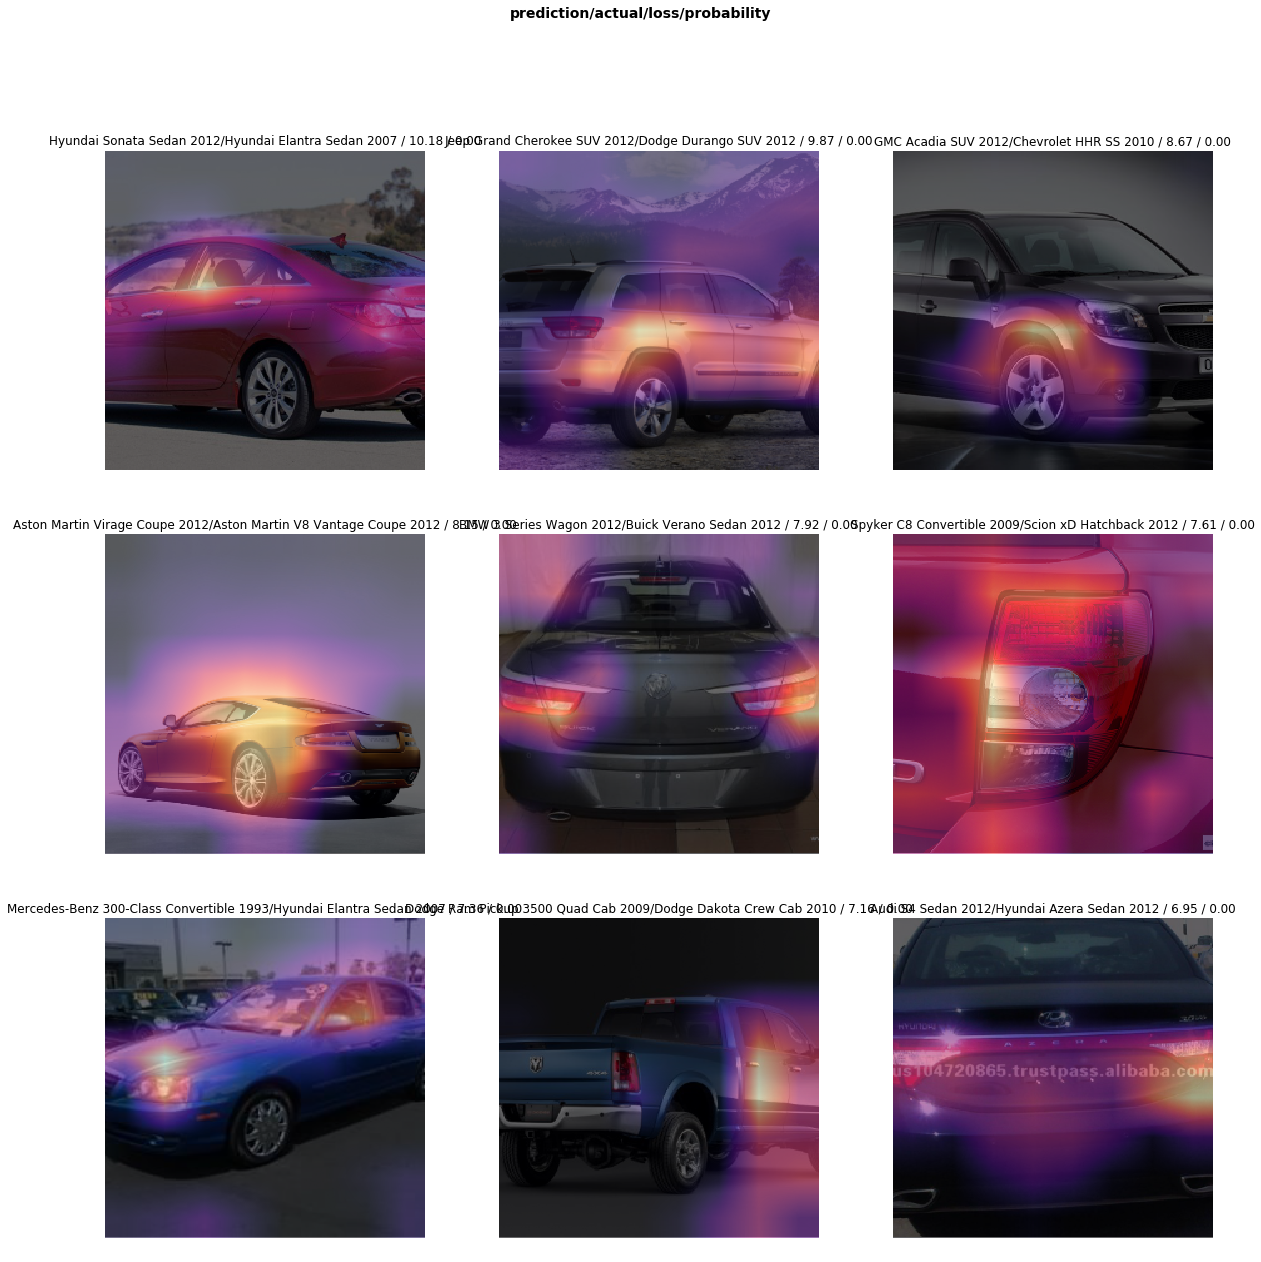

In [39]:
interp.plot_top_losses(9,figsize=(20,20))

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12))

In [ ]:
interp.most_confused(min_val=2)

In [ ]:
data1 = (ImageList.from_folder(path)
        .split_by_rand_pct()
        .label_from_folder()
        .transform(tfms, size=512)
        .databunch()).normalize(imagenet_stats)

In [ ]:
learn.data = data1

In [ ]:
learn.freeze()

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5, slice(1e-5,1e-3))

In [ ]:
learn.save('model1-512')

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(5, slice(1e-4,1e-5))

In [ ]:
learn.recorder.plot_losses()


In [ ]:
learn.save('stage-2-256-rn50')

In [ ]:
learn.export()
